Modifying Jupyter Notebook from Andrej Karpathy  This is only for learning process.

In [4]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt # for making figures
import os
%matplotlib inline

In [5]:
os.chdir("/mnt/data/projects/.immune/Personal/Transformers_Tutorial/")

In [6]:
# read in all the words
words = open('names.txt', 'r').read().splitlines()
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [7]:
len(words)

32033

In [8]:
# build the vocabulary of characters and mappings to/from integers
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [18]:
words[:3]

['emma', 'olivia', 'ava']

In [34]:
context = [0] * block_size
print(context)
print(w + '.')
print(ch)
print(stoi[ch])
print(ix)

[0, 0, 0]
ava.
.
0
0


In [43]:
# build the dataset

block_size = 3 # context length: how many characters do we take to predict the next one?
X, Y = [], []
for w in words[:3]:
  print(w)
  context = [0] * block_size ### so first the context is [0,0,0]
  for ch in w + '.':
    ix = stoi[ch]
    X.append(context)
    # print(X)
    Y.append(ix)
    # print(Y)
    print(''.join(itos[i] for i in context), '--->', itos[ix])
    context = context[1:] + [ix] # crop and append
  
X = torch.tensor(X)
Y = torch.tensor(Y)

emma
... ---> e
..e ---> m
.em ---> m
emm ---> a
mma ---> .
olivia
... ---> o
..o ---> l
.ol ---> i
oli ---> v
liv ---> i
ivi ---> a
via ---> .
ava
... ---> a
..a ---> v
.av ---> a
ava ---> .


In [45]:
X.shape, X.dtype, Y.shape, Y.dtype

(torch.Size([16, 3]), torch.int64, torch.Size([16]), torch.int64)

In [51]:
X ## so it has 000 or ...

tensor([[ 0,  0,  0],
        [ 0,  0,  5],
        [ 0,  5, 13],
        [ 5, 13, 13],
        [13, 13,  1],
        [ 0,  0,  0],
        [ 0,  0, 15],
        [ 0, 15, 12],
        [15, 12,  9],
        [12,  9, 22],
        [ 9, 22,  9],
        [22,  9,  1],
        [ 0,  0,  0],
        [ 0,  0,  1],
        [ 0,  1, 22],
        [ 1, 22,  1]])

In [52]:
Y # it has next letter 5 or e

tensor([ 5, 13, 13,  1,  0, 15, 12,  9, 22,  9,  1,  0,  1, 22,  1,  0])

In [55]:
print(X[[5,6,7,8,9,10,11,12,13]])
print(Y[[4,5,6,7,8,9,10,11,12]])

tensor([[ 0,  0,  0],
        [ 0,  0, 15],
        [ 0, 15, 12],
        [15, 12,  9],
        [12,  9, 22],
        [ 9, 22,  9],
        [22,  9,  1],
        [ 0,  0,  0],
        [ 0,  0,  1]])
tensor([ 0, 15, 12,  9, 22,  9,  1,  0,  1])


In [56]:
### Now we will have training 80%, validation 10%, and testing dataset 10%. 
# build the dataset
block_size = 3 # context length: how many characters do we take to predict the next one?

def build_dataset(words, dt_type):  
  X, Y = [], []
  for w in words:

    #print(w)
    context = [0] * block_size
    for ch in w + '.':
      ix = stoi[ch]
      X.append(context)
      Y.append(ix)
      #print(''.join(itos[i] for i in context), '--->', itos[ix])
      context = context[1:] + [ix] # crop and append

  X = torch.tensor(X)
  Y = torch.tensor(Y)
  print(dt_type + " size")
  print(X.shape, Y.shape)
  return X, Y

import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

Xtr, Ytr = build_dataset(words[:n1], "training")
Xdev, Ydev = build_dataset(words[n1:n2], "validation")
Xte, Yte = build_dataset(words[n2:], "testing")


training size
torch.Size([182625, 3]) torch.Size([182625])
validation size
torch.Size([22655, 3]) torch.Size([22655])
testing size
torch.Size([22866, 3]) torch.Size([22866])


In [63]:
C = torch.randn((27, 2)) ### reducing the dimension of character from 27 character to 2
# as earlier in bigram we have 27 X 27. However this has only 2 dimensions

In [64]:
C.size()

torch.Size([27, 2])

In [68]:
X[1] ## this is ..e from emma

tensor([0, 0, 5])

In [67]:
C[X][1] ### this bascially means X[1] @ C where X[1] is in one-hot encoding

tensor([[-0.8827,  1.1647],
        [-0.8827,  1.1647],
        [-0.4957, -0.0228]])

In [73]:
xenc = F.one_hot(X[1], num_classes=27).float() # input to the network: one-hot encoding

In [74]:
C.shape, xenc.shape

(torch.Size([27, 2]), torch.Size([3, 27]))

In [75]:
xenc @ C

tensor([[-0.8827,  1.1647],
        [-0.8827,  1.1647],
        [-0.4957, -0.0228]])

In [90]:
emb = C[X]
print(X.shape)
print(C.shape)
print(emb.shape)

torch.Size([16, 3])
torch.Size([27, 2])
torch.Size([16, 3, 2])


In [97]:
print()
print(emb[15])
print(X[1])


tensor([[ 0.7818,  0.1291],
        [-0.0788, -0.8541],
        [ 0.7818,  0.1291]])
tensor([0, 0, 5])


In [104]:
len(emb.storage()) ## 16 X 3 X 2
emb.view(8,2,3,2) ### so using .view we can convert it into any different dimension matrix untill multiplication leads to 96

tensor([[[[-0.8827,  1.1647],
          [-0.8827,  1.1647],
          [-0.8827,  1.1647]],

         [[-0.8827,  1.1647],
          [-0.8827,  1.1647],
          [-0.4957, -0.0228]]],


        [[[-0.8827,  1.1647],
          [-0.4957, -0.0228],
          [-0.0876, -0.5631]],

         [[-0.4957, -0.0228],
          [-0.0876, -0.5631],
          [-0.0876, -0.5631]]],


        [[[-0.0876, -0.5631],
          [-0.0876, -0.5631],
          [ 0.7818,  0.1291]],

         [[-0.8827,  1.1647],
          [-0.8827,  1.1647],
          [-0.8827,  1.1647]]],


        [[[-0.8827,  1.1647],
          [-0.8827,  1.1647],
          [-1.2256,  0.5714]],

         [[-0.8827,  1.1647],
          [-1.2256,  0.5714],
          [-0.9936, -0.4590]]],


        [[[-1.2256,  0.5714],
          [-0.9936, -0.4590],
          [ 0.2141, -0.3782]],

         [[-0.9936, -0.4590],
          [ 0.2141, -0.3782],
          [-0.0788, -0.8541]]],


        [[[ 0.2141, -0.3782],
          [-0.0788, -0.8541],
          

In [107]:
### This is the first layer with with 100 neurons from embedding size 3 context * 2 dimension. since each context is 3 X 2 
# so the weights for each character is 6
W1 = torch.randn((6, 100))
b1 = torch.randn(100)

In [106]:
print(emb.view(16,6).shape) ## this will work

# in order to generalize well where your where we donot know the number of words
print(emb.view(X.shape[0],6).shape)
print(emb.view(-1,6).shape)

torch.Size([16, 6])
torch.Size([16, 6])
torch.Size([16, 6])


In [108]:
h = torch.tanh(emb.view(-1, 6) @ W1 + b1)

In [111]:
# This is the first layer has 100 neuron activation which can change based on the weights and biases
h

tensor([[ 1.0000,  0.7529, -0.9343,  ..., -1.0000, -1.0000, -0.4407],
        [ 1.0000, -0.1092, -0.9931,  ..., -0.9999, -0.9995, -0.5429],
        [ 0.9769, -0.6994, -0.9946,  ..., -0.9619, -0.9879, -0.3376],
        ...,
        [ 0.9960, -0.0609, -0.9967,  ..., -0.9951, -0.9856, -0.4053],
        [ 0.9614, -0.3983, -0.9917,  ..., -0.1121, -0.7548, -0.0796],
        [-0.4896, -0.9759, -0.2145,  ...,  0.8819, -0.6777,  0.9303]])

In [110]:
h.shape

torch.Size([16, 100])

In [112]:
### This is the second layer which produce the logit or next character from 100 neuron to 27 logits
W2 = torch.randn((100, 27))
b2 = torch.randn(27)

In [113]:
logits = h @ W2 + b2

In [114]:
logits.shape

torch.Size([16, 27])

In [118]:
counts = logits.exp()

In [119]:
prob = counts / counts.sum(1, keepdims=True)

In [120]:
prob.shape

torch.Size([16, 27])

In [123]:
prob[0]

tensor([2.2184e-07, 4.5503e-06, 7.8495e-11, 1.5246e-11, 1.2430e-13, 2.2567e-04,
        1.1058e-12, 7.0280e-18, 9.9268e-01, 2.2173e-11, 6.2768e-06, 1.4898e-04,
        2.4247e-07, 9.4861e-16, 3.1748e-13, 6.9734e-08, 2.8266e-03, 3.3785e-03,
        7.8950e-11, 2.3989e-09, 3.0645e-11, 8.8173e-08, 2.2946e-05, 4.4995e-10,
        7.0946e-04, 2.4177e-16, 2.2788e-09])

In [125]:
loss = -prob[torch.arange(X.shape[0]), Y].log().mean()
loss

tensor(12.4820)

In [ ]:
# ------------ now made respectable :) ---------------

In [126]:
Xtr.shape, Ytr.shape # dataset

(torch.Size([182625, 3]), torch.Size([182625]))

In [128]:
g = torch.Generator().manual_seed(2147483647) # for reproducibility
C = torch.randn((27, 10), generator=g) ### Random initialization of 27 character into 10 dimensions
W1 = torch.randn((30, 200), generator=g) ### Since the context or bloack size of 3 and with 10 dimesnsion it is 30 and 200 neurons
b1 = torch.randn(200, generator=g) ### Bias in the first layer
W2 = torch.randn((200, 27), generator=g) ### 2nd layer that output the logits from 200 to 27
b2 = torch.randn(27, generator=g) ### Bias in the first layer
parameters = [C, W1, b1, W2, b2] ### we will update these parameter to decrease the loss

In [129]:
sum(p.nelement() for p in parameters) # number of parameters in total

11897

In [130]:
for p in parameters:
  p.requires_grad = True 
### This specify when you move in the forward pass when you perform the backpropgation, it is easily calculates the 
# derivation for each function

In [131]:
### Making -3 means 10^-3 i.e. 0.001 and 10^0 i.e. 1 with 1000 steps
lre = torch.linspace(-3, 0, 1000) 
lrs = 10**lre
lrs

tensor([0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0011,
        0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011,
        0.0011, 0.0011, 0.0011, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012,
        0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0013, 0.0013, 0.0013,
        0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0014,
        0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014,
        0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015,
        0.0015, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016,
        0.0016, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017,
        0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0019,
        0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0020, 0.0020,
        0.0020, 0.0020, 0.0020, 0.0020, 0.0020, 0.0021, 0.0021, 0.0021, 0.0021,
        0.0021, 0.0021, 0.0021, 0.0022, 

In [132]:
lri = []
lossi = []
stepi = []

In [133]:
for i in range(200000): ## total number of epochs
  
  # minibatch construct
  ix = torch.randint(0, Xtr.shape[0], (32,)) ## 32 batch construct so the loss get updated very frequently with less steps
  
  # forward pass
  emb = C[Xtr[ix]] # (32, 3, 10)
  h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 200) here activation function tanh, relu, gelu can be used
  logits = h @ W2 + b2 # (32, 27)
  loss = F.cross_entropy(logits, Ytr[ix]) ### which would be used to calculate the cross entropy which -log likelihood
  #print(loss.item())
  # forward pass
  # logits = xenc @ W # predict log-counts
  # counts = logits.exp() # counts, equivalent to N
  # probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
  # loss = -probs[torch.arange(5), ys].log().mean()
  ## These three lines represent the cross entropy loss. 
  
  # backward pass
  for p in parameters:
    p.grad = None
  loss.backward()
  
  # update
  #lr = lrs[i] # different learning rate
  lr = 0.1 if i < 100000 else 0.01
  for p in parameters:
    p.data += -lr * p.grad

  # track stats
  #lri.append(lre[i])
  stepi.append(i)
  lossi.append(loss.log10().item())

#print(loss.item())

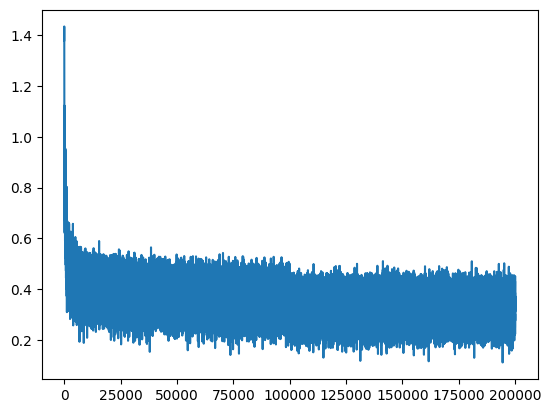

In [134]:
plt.plot(stepi, lossi)

In [135]:
emb = C[Xtr] # (32, 3, 2)
h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ytr)
loss

tensor(2.1323, grad_fn=<NllLossBackward0>)

In [136]:
emb = C[Xdev] # (32, 3, 2)
h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ydev)
loss

tensor(2.1773, grad_fn=<NllLossBackward0>)

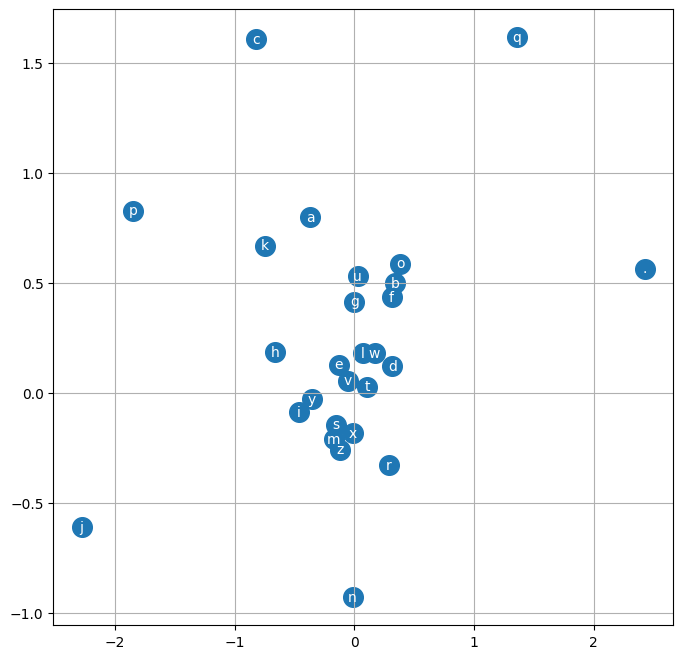

In [137]:
# visualize dimensions 0 and 1 of the embedding matrix C for all characters
plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data, C[:,1].data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i,0].item(), C[i,1].item(), itos[i], ha="center", va="center", color='white')
plt.grid('minor')

In [ ]:
# training split, dev/validation split, test split
# 80%, 10%, 10%

In [138]:
context = [0] * block_size
C[torch.tensor([context])].shape

torch.Size([1, 3, 10])

In [139]:


# sample from the model
g = torch.Generator().manual_seed(2147483647 + 10)

for _ in range(20):
    
    out = []
    context = [0] * block_size # initialize with all ...
    while True:
      emb = C[torch.tensor([context])] # (1,block_size,d)
      h = torch.tanh(emb.view(1, -1) @ W1 + b1)
      logits = h @ W2 + b2
      probs = F.softmax(logits, dim=1)
      ix = torch.multinomial(probs, num_samples=1, generator=g).item()
      context = context[1:] + [ix]
      out.append(ix)
      if ix == 0:
        break
    
    print(''.join(itos[i] for i in out))

eria.
kayah.
see.
med.
rylle.
emmastendrari.
adeerdielin.
shi.
jenu.
keiseananarleigh.
malka.
cayshabergiagriel.
kendreellionnton.
fin.
zence.
ryyah.
famha.
kaysh.
samyah.
hel.
